# __Dynamic Customer Segmentation in E-Commerce: A Comprehensive RFM Analysis of E-Commerce Retail Transactional Data.__

## __Project Overview__
#### __This project analyses customer's buying pattern to come up with a plan to segment customers into different categories using RFM score. Used a dumy retail dataset from [kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset), which contains some transactions made by customers at an e-commerce platform.__
- __Recency (R):__ Measures how recently a customer has made a purchase. Customers who bought recently are often more likely to respond to new marketing efforts
- __Frequency (F):__ Counts how often a customer makes a purchase within a certain timeframe. Frequent buyers are usually more valuable and more likely to engage with promotions.
- __Monetary (M):__ Assesses how much money a customer spends during a given period. Higher spenders are often prioritized for special offers or loyalty programs.
#### __This will help an organization to Understand customer behavior and preferences more deeply, focus resources on high-value customers and tailor campaigns accordingly and Identify at-risk customers and engage them effectively to improve retention rates.__

#### __About the dataset__
#### _InvoiceNo:_ Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
#### _StockCode:_ Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#### _Description:_ Product (item) name. Nominal.
#### _Quantity:_ The quantities of each product (item) per transaction. Numeric.
#### _nvoiceDate:_ Invice Date and time. Numeric, the day and time when each transaction was generated.
#### _UnitPrice:_ Unit price. Numeric, Product price per unit in sterling.
#### _CustomerID:_ Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#### _Country:_ Country name. Nominal, the name of the country where each customer resides.

#### __Import the required libraries.__

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

#### __Let's have a quick overview into the dataset.__

In [54]:
file=r"D:\PP\Project1\Portfolio\File\RFM\online_retail.csv"
df=pd.read_csv(file)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
print(df.info())
print(df.isnull().any().any())
print(df.duplicated().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
True
True


## __Exploratory Data Analysis.__
#### __- It looks like there are some rows with null/NaN and duplicate values.__

In [56]:
print(df.isnull().sum().sum())
print(df.duplicated().sum().sum())

136534
5268


#### __- Here, we are doing RFM analysis so we need the identity; So, let's remove the rows that has no identity (CustomerID) mentioned and let's remove the duplicate rows as well.__

In [57]:
df=df.dropna(subset=['CustomerID'])
df=df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### __- Now, lets check for Null/NaN and duplicated values again.__

In [58]:
print(df.isnull().sum().sum())
print(df.duplicated().sum().sum())

0
0


#### __- So, it seems all the NaN values were in the rows where 'CustomerID' was NaN. Now, let's check if there are any invoices with 0 as UnitPrice, as for a neat and clean analysis we should avoid this kind of values.__

In [59]:
filtered_df = df[df['UnitPrice'].isin([0])]
print(filtered_df.head())
print(filtered_df.shape)

      InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

              InvoiceDate  UnitPrice  CustomerID         Country  
9302  2010-12-05 14:02:00        0.0     12647.0         Germany  
33576 2010-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089 2010-12-21 13:45:00        0.0     14911.0            EIRE  
47068 2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070 2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
(40, 8)


In [60]:
df = df.drop(df[df['UnitPrice'] == 0].index)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### __- Now, we need total price for each of the product, so lets create a separate column mentioniing the total price for each of the product and also lets correct the formatting for "CustomerID" column.__

In [61]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']
df['CustomerID']=df['CustomerID'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### __- Now, There could be some bad transactions like any -ve transaction or 0 value in TotalPrice column.__

In [86]:
grouped=df.groupby("CustomerID")[["Quantity", "TotalPrice"]].agg("sum").sort_values("CustomerID").reset_index()
bad_transactions=grouped[grouped["TotalPrice"]<=0]
bad_transactions.head()

,CustomerID,Quantity,TotalPrice
0,12346,0,0.00
125,12503,-1,-1126.00
127,12505,-1,-4.50
212,12605,-4,-7.50
264,12666,-56,-227.44


#### __- So now we know which customerID comes under bad transaction. So, we will remove those to keep a clean relation between 'Recency', 'Frequency' and 'Monetary' value.__

In [88]:
ids_to_remove=asd1["CustomerID"].tolist()
ids_to_remove

[12346,
 12503,
 12505,
 12605,
 12666,
 12870,
 12943,
 13154,
 13364,
 13672,
 13693,
 13829,
 13958,
 14119,
 14213,
 14437,
 14557,
 14627,
 14679,
 14777,
 14792,
 15369,
 15590,
 15638,
 15728,
 15802,
 15823,
 16061,
 16138,
 16252,
 16262,
 16428,
 16454,
 16546,
 16579,
 16742,
 16878,
 16995,
 17065,
 17307,
 17448,
 17547,
 17548,
 17603,
 17820,
 18072,
 18141,
 18256,
 18268]

In [149]:
df_cleaned=df[~df["CustomerID"].isin(ids_to_remove)]
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### __- Now, lets check again if we have missed any bad transactions.__

In [150]:
grouped1=df_cleaned.groupby("CustomerID")[["Quantity", "TotalPrice"]].agg("sum").sort_values("CustomerID").reset_index()
checked=grouped1[grouped1["TotalPrice"]<0]
checked

,CustomerID,Quantity,TotalPrice


## __RFM Analysis__
#### __This is a dumy data therefore to do the calculation properly we will create a reference date using the maximum date mentioned in the "InvoiceDate" column.__

In [151]:
reff_date=df_cleaned["InvoiceDate"].max() + dt.timedelta(days=1)
reff_date

Timestamp('2011-12-10 12:50:00')

In [189]:
rfm=df_cleaned.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reff_date-x.max()).days, 
     "InvoiceNo": "count", 
    "TotalPrice": "sum"}).rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"})
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
12352,36,95,1545.41
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,13,176.60


#### __- Now lets assing score for each of the column.__

In [190]:
quantiles=rfm.quantile(q=[0.25, 0.50, 0.75])
def grade (x, p, d):
    if p== "Recency":
        if x<= d[p][0.25]:
            return 4
        elif x<= d[p][0.50]:
            return 3
        elif x<= d[p][0.75]:
            return 2
        else:
            return 1
    else:
        if x<= d[p][0.25]:
            return 1
        elif x<= d[p][0.50]:
            return 2
        elif x<= d[p][0.75]:
            return 3
        else:
            return 4
rfm ["R"] = rfm["Recency"].apply(grade, args=("Recency", quantiles,))
rfm ["F"] = rfm["Frequency"].apply(grade, args=("Frequency", quantiles,))
rfm ["M"] = rfm["Monetary"].apply(grade, args=("Monetary", quantiles,))
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,19,73,1757.55,3,3,4
12350,310,17,334.40,1,1,2
12352,36,95,1545.41,3,3,3
...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1
18281,181,7,80.82,1,1,1
18282,8,13,176.60,4,1,1


In [191]:
rfm["RFM_score"]=rfm[["R", "F", "M"]].sum(axis=1)
rfm["RFM_segment"]=rfm["R"].astype(str)+rfm["F"].astype(str)+rfm["M"].astype(str)
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_score,RFM_segment
CustomerID,,,,,,,,
12347,2,182,4310.00,4,4,4,12,444
12348,75,31,1797.24,2,2,4,8,224
12349,19,73,1757.55,3,3,4,10,334
12350,310,17,334.40,1,1,2,4,112
12352,36,95,1545.41,3,3,3,9,333
...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,3,111
18281,181,7,80.82,1,1,1,3,111
18282,8,13,176.60,4,1,1,6,411


#### __- Let's categorise the customers in High, Medium and Low based on "RFM_score" column.__

In [192]:
def categorise (y):
    if y<5:
        return "Low Value"
    elif y<9 and y>=5:
        return "Medium Value"
    else:
        return "High Value"
rfm["RFM_category"]=rfm["RFM_score"].apply(categorise)
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_score,RFM_segment,RFM_category
CustomerID,,,,,,,,,
12347,2,182,4310.00,4,4,4,12,444,High Value
12348,75,31,1797.24,2,2,4,8,224,Medium Value
12349,19,73,1757.55,3,3,4,10,334,High Value
12350,310,17,334.40,1,1,2,4,112,Low Value
12352,36,95,1545.41,3,3,3,9,333,High Value
...,...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,3,111,Low Value
18281,181,7,80.82,1,1,1,3,111,Low Value
18282,8,13,176.60,4,1,1,6,411,Medium Value


#### __- An overview of the population under each segments.__

In [193]:
category_count=rfm["RFM_category"].value_counts().reset_index()
category_count

,RFM_category,count
0,Medium Value,1861
1,High Value,1667
2,Low Value,794


## __Data Vizualization__

Text(0.5, 1.0, 'Customer distribution by RFM categories')

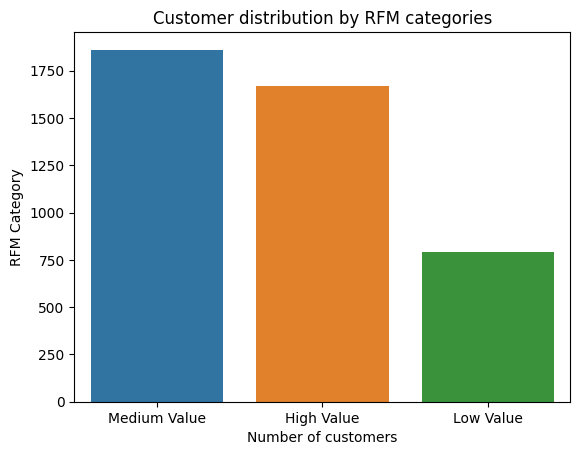

In [194]:
sns.barplot(x="RFM_category", y="count", hue="RFM_category", data= category_count)
plt.xlabel("Number of customers")
plt.ylabel("RFM Category")
plt.title("Customer distribution by RFM categories")

#### __- Label the customers based on some specific requirements. This can help to improve marketting strategies.__

In [195]:
def customer_label (z):
    if z>=9:
        return "VIP/Loyal"
    elif z<9 and z>=6:
        return "To be Loyal"
    elif z<6 and z>=5:
        return "Balanced"
    elif z<5 and z>=4:
        return "At Risk"
    else:
        return "Lost"
rfm["RFM_customer_label"]=rfm["RFM_score"].apply(customer_label)
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_score,RFM_segment,RFM_category,RFM_customer_label
CustomerID,,,,,,,,,,
12347,2,182,4310.00,4,4,4,12,444,High Value,VIP/Loyal
12348,75,31,1797.24,2,2,4,8,224,Medium Value,To be Loyal
12349,19,73,1757.55,3,3,4,10,334,High Value,VIP/Loyal
12350,310,17,334.40,1,1,2,4,112,Low Value,At Risk
12352,36,95,1545.41,3,3,3,9,333,High Value,VIP/Loyal
...,...,...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,3,111,Low Value,Lost
18281,181,7,80.82,1,1,1,3,111,Low Value,Lost
18282,8,13,176.60,4,1,1,6,411,Medium Value,To be Loyal


#### __- An overview of the population under each label and each segment.__

In [196]:
customer_label_count=rfm["RFM_customer_label"].value_counts().reset_index()
customer_label_count

,RFM_customer_label,count
0,VIP/Loyal,1667
1,To be Loyal,1357
2,Balanced,504
3,At Risk,415
4,Lost,379


In [200]:
segment_count=rfm.groupby(["RFM_category", "RFM_customer_label"]).size().reset_index(name="Count").sort_values("Count", ascending=False)
segment_count

,RFM_category,RFM_customer_label,Count
0,High Value,VIP/Loyal,1667
4,Medium Value,To be Loyal,1357
3,Medium Value,Balanced,504
1,Low Value,At Risk,415
2,Low Value,Lost,379


#### __- So, we can observe that all the High value customers are most loyal. So, let's check if there is any correlation between Recency, Frequency and Monetary value.__

<Axes: >

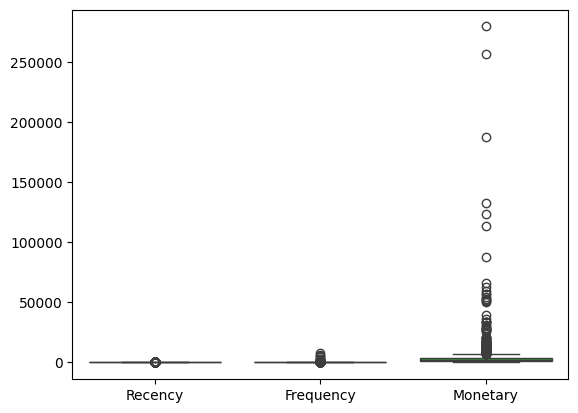

In [219]:
vip=rfm[rfm["RFM_customer_label"]=="VIP/Loyal"]
vip_rfm=vip[["Recency", "Frequency", "Monetary"]]
vip_rfm
sns.boxplot(vip_rfm)

Text(0.5, 1.0, 'Correlation matrix of RFM values within VIP customer segment')

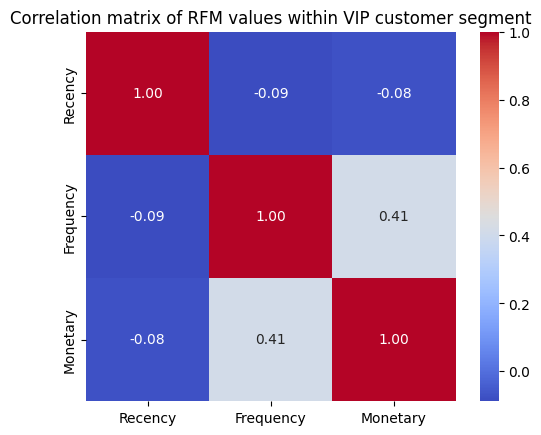

In [221]:
corr_mat=vip_rfm.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation matrix of RFM values within VIP customer segment')

<Axes: xlabel='RFM_customer_label', ylabel='RFM_score'>

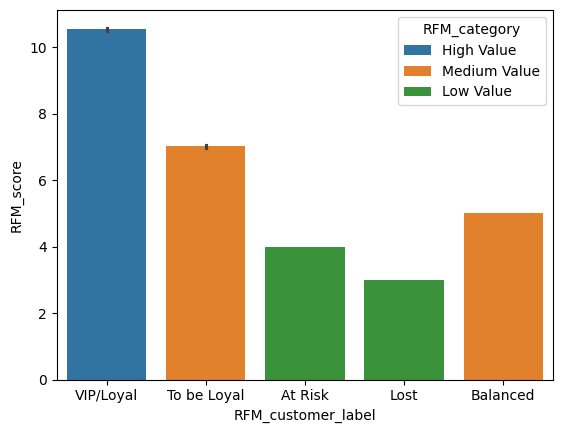

In [222]:
sns.barplot(x='RFM_customer_label', y='RFM_score', hue='RFM_category', data=rfm)

In [231]:
seg_score=rfm.groupby("RFM_customer_label")[["R", "F", "M"]].mean().reset_index()
seg_score_melted = seg_score.melt(id_vars='RFM_customer_label', value_vars=['R', 'F', 'M'], var_name='Metric', value_name='Value')
seg_score_melted

,RFM_customer_label,Metric,Value
0,At Risk,R,1.448193
1,Balanced,R,1.748016
2,Lost,R,1.000000
3,To be Loyal,R,2.448047
4,VIP/Loyal,R,3.403119
5,At Risk,F,1.265060
6,Balanced,F,1.617063
7,Lost,F,1.000000
8,To be Loyal,F,2.259396
9,VIP/Loyal,F,3.575285


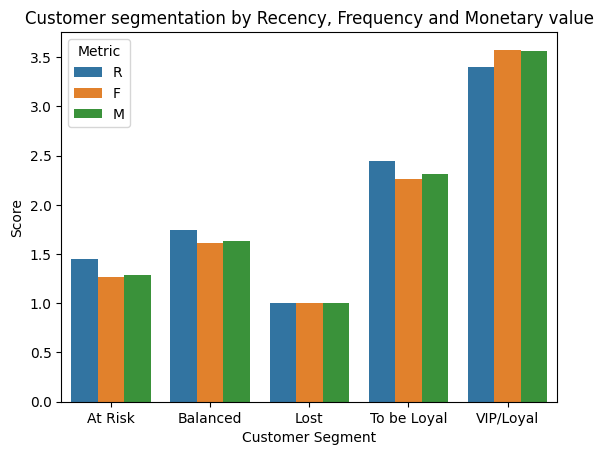

In [234]:
sns.barplot(x='RFM_customer_label', y='Value', hue='Metric', data=seg_score_melted)
plt.title("Customer segmentation by Recency, Frequency and Monetary value")
plt.xlabel('Customer Segment')
plt.ylabel('Score')
plt.legend(title='Metric')

## __Conclusion__ 

##### __Customer Segmentation:__

- The customer base is primarily composed of Medium Value (1861) and High Value (1667) segments, indicating a strong potential for engagement and loyalty.
- A smaller portion falls into the Low Value (794) category, highlighting a need for re-engagement strategies.
##### __High-Value Segment:__

- The High Value segment (1667 customers) is categorized as VIP/Loyal. This group represents a significant portion of revenue and should be prioritized for exclusive offers and loyalty programs.
##### __Medium-Value Insights:__

The Medium Value group includes:
- To be Loyal (1357 customers): This segment shows potential for growth into loyal customers and should be targeted with marketing campaigns to enhance loyalty.
- Balanced (504 customers): These customers have a balanced purchasing pattern and may benefit from targeted promotions to increase frequency or spend.
##### __Low-Value Segment Concerns:__

- The Low Value segment comprises At Risk (415 customers) and Lost (379 customers) categories.
At Risk customers need re-engagement strategies, such as personalized offers or reminders, to prevent them from becoming lost customers.
Lost customers represent an opportunity for win-back campaigns, possibly through special promotions to entice their return.

##### __Strategic Recommendations:__

- Develop tailored marketing strategies for each segment to maximize customer retention and increase lifetime value.
- Focus resources on retaining High Value and Medium Value customers while implementing targeted win-back strategies for Low Value customers.
- Regularly monitor these segments to adapt strategies based on changing customer behaviors and purchase patterns.